# CIS545 Final Project: *Multidimensional Analysis of the Effects of Climate Change via the Combination between Earth's Surface Temperature and Ecological and Social Data*

### by Lucan Yan, Yicheng Xia, Haochen Gao

This project primarily focuses on the earth's surface temperature data from 1750 to analyze climate change during these years. To analyze various natural effects of climate change, we combine the data with those of sea level, glacier elevation, hurricanes and typhoons, and oceanic fish. Then for social effects, we try to evaluate the climate changes with the datasets of US droughts and global GDP. 

Plus, we plan to use collected Twitter dataset to do sentiment analysis against people's attitudes towards climate change. Thus we can achieve a result where clear effects in both natural and human areas can be predicted and visualized, which is of significance to human beings' future development.

Here we go! :)

# Instructions

For this project, we provide at least 2 kinds of diliverable formats. You can either

*   **run this notebook** using Google Colab, or
*   **view our video presentation** with the inserted YouTube link below.



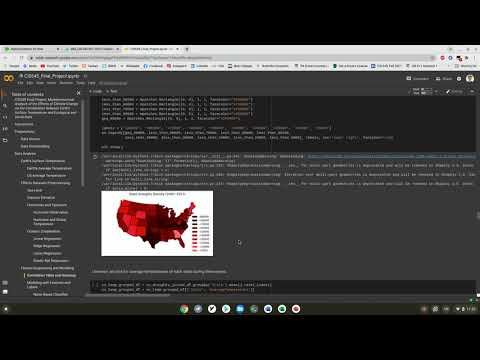

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('R1h52b7qDt0')

# Preparations



## Data Source

We collected our raw data from the sources below:

1. [Climate Change: Earth Surface Temperature Data](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data) which explores global temperatures since 1750.
2. [Sea Level Change](https://www.kaggle.com/somesh24/sea-level-change) which is the global average absolute sea level change from 1880 to 2014.
3. [Glaciers Elevation](https://www.kaggle.com/futurecoderssecic/glaciers-elevation) which includes the elevation change and the mass balance data of glaciers from the 19th century to present.
4. [Hurricanes and Typhoons, 1851-2014](https://www.kaggle.com/noaa/hurricane-database) which documents the location, wind, and pressure of tropical cyclones in the Atlantic and Pacific Oceans.
5. [United States Droughts by County](https://www.kaggle.com/us-drought-monitor/united-states-droughts-by-county) which includes the weekly data on extent and severity of drought in each US county from 2000 to present.
6. [CalCOFI](https://new.data.calcofi.org/index.php/database/zooplankton-data) which includes over 60 years of zooplankton data.
7. [GDP & Population](https://www.kaggle.com/jjmewtw/gdp-population-years-1-to-2008): years 1 to 2008 which includes continuous year-by-years records since 1830 and estimated earlier data.
8. [Twitter Climate Change Sentiment Dataset](https://www.kaggle.com/edqian/twitter-climate-change-sentiment-dataset) which is a collected Twitter dataset for climate change sentiment analysis.


## Data Downloading

First of all, we need to import data from Kaggle to Google Colab (this notebook).

To do this, we set up with Kaggle's beta API.

In [ ]:
!pip install kaggle

import json
token = {"username":"xiayicheng","key":"14a31ec8655d631ebda0c246794e4694"}
with open('/content/kaggle.json', 'w') as file:
  json.dump(token, file)

!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config set -n path -v /content

- path is now set to: /content


Now we can download those datasets directly from Kaggle.

In [ ]:
!kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data -p /content
!kaggle datasets download -d somesh24/sea-level-change -p /content
!kaggle datasets download -d futurecoderssecic/glaciers-elevation -p /content
!kaggle datasets download -d noaa/hurricane-database -p /content
!kaggle datasets download -d us-drought-monitor/united-states-droughts-by-county -p /content
!kaggle datasets download -d jjmewtw/gdp-population-years-1-to-2008 -p /content
!kaggle datasets download -d sohamgade/plastic-datasets -p /content
!kaggle datasets download -d edqian/twitter-climate-change-sentiment-dataset -p /content

 87% 74.0M/84.7M [00:00<00:00, 70.1MB/s]
100% 84.7M/84.7M [00:00<00:00, 95.3MB/s]
  0% 0.00/7.53k [00:00<?, ?B/s]
100% 7.53k/7.53k [00:00<00:00, 2.90MB/s]
  0% 0.00/2.93M [00:00<?, ?B/s]
100% 2.93M/2.93M [00:00<00:00, 47.2MB/s]
  0% 0.00/901k [00:00<?, ?B/s]
100% 901k/901k [00:00<00:00, 60.9MB/s]
 60% 9.00M/15.1M [00:00<00:00, 42.1MB/s]
100% 15.1M/15.1M [00:00<00:00, 50.0MB/s]
  0% 0.00/86.5k [00:00<?, ?B/s]
100% 86.5k/86.5k [00:00<00:00, 33.9MB/s]
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 50.0MB/s]
  0% 0.00/2.46M [00:00<?, ?B/s]
100% 2.46M/2.46M [00:00<00:00, 81.6MB/s]


There is a zooplankton dataset we need to directly download from its posting website.

In [ ]:
!wget https://calcofi.org/downloads/database/195101-201607_1701-1704_1802-1804_Zoop.zip

--2021-12-16 03:04:19--  https://calcofi.org/downloads/database/195101-201607_1701-1704_1802-1804_Zoop.zip
Resolving calcofi.org (calcofi.org)... 192.185.237.170
Connecting to calcofi.org (calcofi.org)|192.185.237.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1466535 (1.4M) [application/zip]
Saving to: ‘195101-201607_1701-1704_1802-1804_Zoop.zip’

195101-201607_1701- 100%[===================>]   1.40M  1.25MB/s    in 1.1s    

2021-12-16 03:04:21 (1.25 MB/s) - ‘195101-201607_1701-1704_1802-1804_Zoop.zip’ saved [1466535/1466535]



We unzip and check the downloaded datasets below.

In [ ]:
!unzip \*.zip

Archive:  climate-change-earth-surface-temperature-data.zip
  inflating: GlobalLandTemperaturesByCity.csv  
  inflating: GlobalLandTemperaturesByCountry.csv  
  inflating: GlobalLandTemperaturesByMajorCity.csv  
  inflating: GlobalLandTemperaturesByState.csv  
  inflating: GlobalTemperatures.csv  

Archive:  glaciers-elevation.zip
  inflating: Glaciers elevation data/_C3S_ELEVATION_CHANGE_DATA_20170405.csv  
  inflating: Glaciers elevation data/_C3S_ELEVATION_CHANGE_DATA_20171004.csv  
  inflating: Glaciers elevation data/_C3S_ELEVATION_CHANGE_DATA_20180601.csv  
  inflating: Glaciers elevation data/_C3S_ELEVATION_CHANGE_DATA_20181103.csv  
  inflating: Glaciers elevation data/_C3S_MASS_BALANCE_DATA_20170405.csv  
  inflating: Glaciers elevation data/_C3S_MASS_BALANCE_DATA_20171004.csv  
  inflating: Glaciers elevation data/_C3S_MASS_BALANCE_DATA_20180601.csv  
  inflating: Glaciers elevation data/_C3S_MASS_BALANCE_DATA_20181103.csv  

Archive:  sea-level-change.zip
  inflating: sea_le

Finally, we can freely process the data now.

Try with Pandas.

In [ ]:
import pandas as pd

# 1: climate-change-earth-surface-temperature-data.zip
GlobalLandTemperaturesByCity_df = pd.read_csv('GlobalLandTemperaturesByCity.csv')
GlobalLandTemperaturesByCountry_df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
GlobalLandTemperaturesByMajorCity_df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
GlobalLandTemperaturesByState_df = pd.read_csv('GlobalLandTemperaturesByState.csv')
GlobalTemperatures_df = pd.read_csv('GlobalTemperatures.csv')

# 2: sea-level-change.zip
sea_levels_df = pd.read_csv('sea_levels_2015.csv')

# 3: glaciers-elevation.zip
ELEVATION_CHANGE_DATA_20170405_df = pd.read_csv('Glaciers elevation data/_C3S_ELEVATION_CHANGE_DATA_20170405.csv', delimiter=';', encoding='latin-1')
ELEVATION_CHANGE_DATA_20171004_df = pd.read_csv('Glaciers elevation data/_C3S_ELEVATION_CHANGE_DATA_20171004.csv', delimiter=';', encoding='latin-1')
ELEVATION_CHANGE_DATA_20180601_df = pd.read_csv('Glaciers elevation data/_C3S_ELEVATION_CHANGE_DATA_20180601.csv', encoding='latin-1')
ELEVATION_CHANGE_DATA_20181103_df = pd.read_csv('Glaciers elevation data/_C3S_ELEVATION_CHANGE_DATA_20181103.csv', encoding='latin-1')
MASS_BALANCE_DATA_20170405_df = pd.read_csv('Glaciers elevation data/_C3S_MASS_BALANCE_DATA_20170405.csv', delimiter=';', encoding='latin-1')
MASS_BALANCE_DATA_20171004_df = pd.read_csv('Glaciers elevation data/_C3S_MASS_BALANCE_DATA_20171004.csv', delimiter=';', encoding='latin-1')
MASS_BALANCE_DATA_20180601_df = pd.read_csv('Glaciers elevation data/_C3S_MASS_BALANCE_DATA_20180601.csv', encoding='latin-1')
MASS_BALANCE_DATA_20181103_df = pd.read_csv('Glaciers elevation data/_C3S_MASS_BALANCE_DATA_20181103.csv', encoding='latin-1')

# 4: hurricane-database.zip
atlantic_df = pd.read_csv('atlantic.csv')
pacific_df = pd.read_csv('pacific.csv')

# 5: united-states-droughts-by-county.zip
county_info_df = pd.read_csv('county_info_2016.csv', encoding='latin-1')
us_droughts_df = pd.read_csv('us-droughts.csv')

# 6: 195101-201607_1701-1704_1802-1804_Zoop.zip
zooplankton_df = pd.read_csv('195101-201607_1701-1704_1802-1804_Zoop.csv', low_memory=False)

# 7: gdp-population-years-1-to-2008.zip
GDP_Data_Year_1_df = pd.read_csv('GDP_Data_Year_1_To_2008.csv', delimiter=';')
Population_Data_Year_1_df = pd.read_csv('Population_Data_Year_1_To_2008.csv', delimiter=';')

# 8: plastic-datasets.zip
global_plastics_production_df = pd.read_csv('global-plastics-production.csv')
mismanaged_waste_global_total_df = pd.read_csv('mismanaged-waste-global-total.csv')
per_capita_mismanaged_plastic_waste_vs_gdp_per_capita_df = pd.read_csv('per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv')
per_capita_plastic_waste_vs_gdp_per_capita_df = pd.read_csv('per-capita-plastic-waste-vs-gdp-per-capita.csv')
plastic_waste_per_capita_df = pd.read_csv('plastic-waste-per-capita.csv')

# 9: twitter-climate-change-sentiment-dataset.zip
twitter_sentiment_data_df = pd.read_csv('twitter_sentiment_data.csv')

# Data Analysis

We install and import some needed packages here.

In [ ]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=14201aea4783099b81934f325f0166d5dd1f5b803ad849437902535c257ad77f
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandasql as ps
import seaborn as sns
from datetime import datetime

## Earth's Surface Temperature

In this part, we first plot Earth's temperature as a preview, and extract temperature in the US for later use.

### Earth's Average Temperature

We convert the column `dt` to datetime format and take a look at the whole dataframe.

In [ ]:
GlobalTemperatures_df['dt'] = pd.to_datetime(GlobalTemperatures_df['dt'])

We extracted the needed columns of `LandAverageTemperature` and `LandAndOceanAverageTemperature` from `GlobalTemperatures_df`. Columns year and month are converted from the original dt column, which was dropped afterward

In [ ]:
GlobalTemperatures_extracted_df = GlobalTemperatures_df[['dt', 'LandAverageTemperature', 'LandAndOceanAverageTemperature']]
GlobalTemperatures_extracted_df['year'] = GlobalTemperatures_extracted_df['dt'].dt.year
GlobalTemperatures_extracted_df['month'] = GlobalTemperatures_extracted_df['dt'].dt.month
GlobalTemperatures_extracted_df = GlobalTemperatures_extracted_df.drop(columns='dt').dropna()
GlobalTemperatures_extracted_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,LandAverageTemperature,LandAndOceanAverageTemperature,year,month
1200,0.749,12.833,1850,1
1201,3.071,13.588,1850,2
1202,4.954,14.043,1850,3
1203,7.217,14.667,1850,4
1204,10.004,15.507,1850,5
...,...,...,...,...
3187,14.755,17.589,2015,8
3188,12.999,17.049,2015,9
3189,10.801,16.290,2015,10
3190,7.433,15.252,2015,11


At the beginning, we create a figure to help us better visualize the climate change through the time.

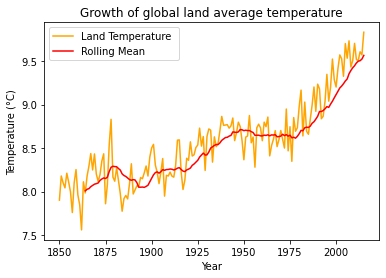

In [ ]:
GlobalTemp_year_avg_df = GlobalTemperatures_extracted_df.groupby('year').mean().drop(columns = ['month'])
land_temp_series = GlobalTemp_year_avg_df['LandAverageTemperature']

# Rolling statistics, computed over windows of length 150
rolling_land_mean = pd.Series.rolling(land_temp_series, window=15).mean()
plt.plot(land_temp_series,color='orange',label = 'Land Temperature ')
plt.plot(rolling_land_mean,color='red',label='Rolling Mean')
plt.title('Growth of global land average temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()

It is quite obvious that the temperature on earth is keep increasing in the past 150 years, and the gradient became particularly rapid in the recent 50 years.


Furthermore, we use the heatmap to visualize the temperture from 1750 - 2015, by each month.

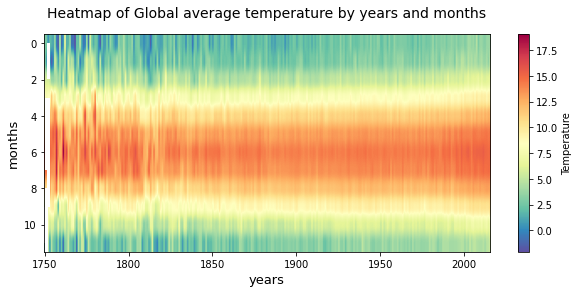

In [ ]:
temp_data = GlobalTemperatures_df
temp_data = temp_data.set_index('dt')
series = temp_data['LandAverageTemperature']
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values
fig = plt.figure(figsize = (10,4))
ax = plt.gca()
im = ax.matshow(years, cmap= plt.cm.Spectral_r, interpolation = None, aspect ='auto')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(np.arange(0,265,50))
ax.set_xticklabels(['1750','1800','1850','1900','1950','2000'])
cbar = fig.colorbar(im)
cbar.set_label('Temperature')
plt.ylabel('months',fontsize = 13)
plt.xlabel('years',fontsize = 13)
plt.title('Heatmap of Global average temperature by years and months',fontsize = 14)
plt.show()


The raise of temperature over time could be seen by the increase of yellow and red range in the above figure.

Also,we present the distribution of a total average global temperature from 1850 - 2015

Text(0.5, 1.0, 'Global Temperature distribution from 1850-2015')

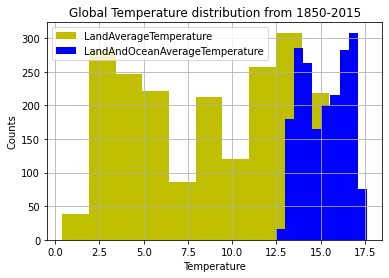

In [ ]:
series_sea_land = GlobalTemperatures_extracted_df['LandAndOceanAverageTemperature']
series_land = GlobalTemperatures_extracted_df['LandAverageTemperature']
ax = series_land.hist(legend = 'Land Average', color = 'y')
series_sea_land.hist(legend = 'Land and ocean Average', color = 'b')
ax.set_xlabel('Temperature')
ax.set_ylabel('Counts')
ax.set_title('Global Temperature distribution from 1850-2015')


We found in the above histogram that temperature is not evenly distributed, and there is a trend that medium value is less common comparing to the minimum and maximun temperature value, both in the land and land ocean datasets.

### US Average Temperature

We filter the dateframe with the `Country` column be United States. Then, we convert the column `dt` to datatime format

In [ ]:
Temperature_US_df = GlobalLandTemperaturesByCountry_df[GlobalLandTemperaturesByCountry_df['Country'] == 'United States']
Temperature_US_df['dt'] = pd.to_datetime(Temperature_US_df['dt'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Effects Datasets Preprocessing

In this part, we analyze the natural effects following the earth's temperature changes.

To achieve this, we combine US temperature datasets with those about natural effects like Sea Level, Glaciers Elevation, Hurricanes and Typhoons, and Oceanic Zooplankton (excluding Droughts).

We extracted the needed columns of `LandAverageTemperature` and `LandAndOceanAverageTemperature` from `GlobalTemperatures_df`. Columns `year` and `month` are converted from the original dt column, which was dropped afterward.

### Sea Level

For sea levels, we extract `Time` column, which is first converted to datetime format and then dropped with `year` and `month` columns got. We also keep the needed `GMSL` (Global Mean Sea Level, mm) column.

In [ ]:
sea_levels_extracted_df = sea_levels_df.copy()
sea_levels_extracted_df['Time'] = pd.to_datetime(sea_levels_extracted_df['Time'])
sea_levels_extracted_df['year'] = sea_levels_extracted_df['Time'].dt.year
sea_levels_extracted_df['month'] = sea_levels_extracted_df['Time'].dt.month
sea_levels_extracted_df = sea_levels_extracted_df.drop(columns=['Time', 'GMSL uncertainty'])
sea_levels_extracted_df

,GMSL,year,month
0,-183.0,1880,1
1,-171.1,1880,2
2,-164.3,1880,3
3,-158.2,1880,4
4,-158.7,1880,5
...,...,...,...
1603,71.6,2013,8
1604,68.8,2013,9
1605,66.4,2013,10
1606,59.7,2013,11


### Glaciers Elevation

For gaciers' elevation changes, we extract `SURVEY_DATE` column, which is to calculate `year` and `month` columns.

**Notice 1:** Some missing months are incorrectly marked as **99**, we filter and drop such improper data.

Finally, we group by `year` and `month` columns and sum the elevation changes.

In [ ]:
elevation_changed_extracted_df = ELEVATION_CHANGE_DATA_20181103_df.copy()
elevation_changed_extracted_df['year'] = elevation_changed_extracted_df['SURVEY_DATE'] // 10000
elevation_changed_extracted_df['month'] = elevation_changed_extracted_df['SURVEY_DATE'] // 100 - elevation_changed_extracted_df['year'] * 100
elevation_changed_extracted_df = elevation_changed_extracted_df[elevation_changed_extracted_df['month'] <= 12]
elevation_changed_extracted_df = elevation_changed_extracted_df[['year', 'month', 'ELEVATION_CHANGE']]
elevation_changed_extracted_df = elevation_changed_extracted_df.groupby(['year', 'month']).sum().reset_index()
elevation_changed_extracted_df

,year,month,ELEVATION_CHANGE
0,1920,7,-9880.0
1,1923,9,-25460.0
2,1927,9,-25960.0
3,1929,8,-32200.0
4,1929,9,-11070.0
...,...,...,...
307,2017,10,-470365.0
308,2017,11,-274661.0
309,2017,12,-1017891.0
310,2018,2,-5324167.0


**Notice 2:** We lack the data filling every year and month, but we expect a continuous series of data to trace it changes. Thus we need to *upsample* to every months in this period.

We then create the full years and months and fill `ELEVATION_CHANGE` with the average value of two adjacent ones to complement the missing values.

In [ ]:
elevation_full = []
for year in range(1920, 2019):
  for month in range(1, 13):
    elevation_full.append([year, month])
elevation_full_df = pd.DataFrame(elevation_full, columns=['year', 'month'])
elevation_changed_extracted_df = pd.merge(elevation_changed_extracted_df, elevation_full_df, left_on=['year', 'month'], right_on=['year', 'month'], how='right')
elevation_changed_extracted_df['ELEVATION_CHANGE'] = elevation_changed_extracted_df.ELEVATION_CHANGE.ffill().\
                                                     add(elevation_changed_extracted_df.ELEVATION_CHANGE.bfill()).div(2)
elevation_changed_extracted_df = elevation_changed_extracted_df.dropna()
elevation_changed_extracted_df

,year,month,ELEVATION_CHANGE
6,1920,7,-9880.0
7,1920,8,-17670.0
8,1920,9,-17670.0
9,1920,10,-17670.0
10,1920,11,-17670.0
...,...,...,...
1174,2017,11,-274661.0
1175,2017,12,-1017891.0
1176,2018,1,-3171029.0
1177,2018,2,-5324167.0


### Hurricanes and Typhoons
The full data is seperated to `atlantic_df` and `pacific_df` in our raw data source, so need to process them seperatedly first. We calculate `year` and `month` columns from the original `Date` column. Then we groupby `year` and `month` to get the count of hurricanes and the maximum of winds every month.

In [ ]:
atlantic_extracted_df = atlantic_df.groupby('ID').max('Maximum Wind').reset_index()
atlantic_extracted_df['year'] = atlantic_extracted_df['Date'] // 10000
atlantic_extracted_df['month'] = atlantic_extracted_df['Date'] // 100 - atlantic_extracted_df['year'] * 100
atlantic_extracted_df = atlantic_extracted_df[['ID', 'year', 'month', 'Maximum Wind']]
atlantic_extracted_df = atlantic_extracted_df.groupby(['year', 'month']).agg({'ID': 'count', 'Maximum Wind': 'max'}).reset_index()
atlantic_extracted_df = atlantic_extracted_df.rename(columns={'ID': 'hurricanes_count'})
atlantic_extracted_df

,year,month,hurricanes_count,Maximum Wind
0,1851,6,1,80
1,1851,7,2,80
2,1851,8,1,100
3,1851,9,1,50
4,1851,10,1,60
...,...,...,...,...
735,2015,7,1,45
736,2015,8,2,110
737,2015,9,5,75
738,2015,10,1,135


In [ ]:
pacific_extracted_df = pacific_df.groupby('ID').max('Maximum Wind').reset_index()
pacific_extracted_df['year'] = pacific_extracted_df['Date'] // 10000
pacific_extracted_df['month'] = pacific_extracted_df['Date'] // 100 - pacific_extracted_df['year'] * 100
pacific_extracted_df = pacific_extracted_df[['ID', 'year', 'month', 'Maximum Wind']]
pacific_extracted_df = pacific_extracted_df.groupby(['year', 'month']).agg({'ID': 'count', 'Maximum Wind': 'max'}).reset_index()
pacific_extracted_df = pacific_extracted_df.rename(columns={'ID': 'hurricanes_count'})
pacific_extracted_df

,year,month,hurricanes_count,Maximum Wind
0,1949,6,2,45
1,1949,9,4,75
2,1950,6,1,75
3,1950,7,2,75
4,1950,8,3,75
...,...,...,...,...
370,2015,7,5,115
371,2015,8,3,125
372,2015,9,6,135
373,2015,10,3,185


We join `atlantic_extracted_df` and `pacific_extracted_df` on `year` and `month`.

In [ ]:
hurricanes_joined_df = pd.merge(atlantic_extracted_df, pacific_extracted_df, left_on=['year', 'month'], right_on=['year', 'month'], how='outer')
hurricanes_joined_df = hurricanes_joined_df.fillna(0)
hurricanes_joined_df['hurricanes_count'] = (hurricanes_joined_df['hurricanes_count_x'] + hurricanes_joined_df['hurricanes_count_y']).astype(int)
hurricanes_joined_df['Maximum Wind'] = hurricanes_joined_df[['Maximum Wind_x', 'Maximum Wind_y']].max(axis=1).astype(int)
hurricanes_joined_df = hurricanes_joined_df.drop(columns=['hurricanes_count_x', 'hurricanes_count_y', 'Maximum Wind_x', 'Maximum Wind_y'])
hurricanes_joined_df

,year,month,hurricanes_count,Maximum Wind
0,1851,6,1,80
1,1851,7,2,80
2,1851,8,1,100
3,1851,9,1,50
4,1851,10,1,60
...,...,...,...,...
828,2012,11,1,45
829,2013,5,2,70
830,2014,5,1,135
831,2014,6,2,130


Here we need to *upsample* to every month again. Clearly, years and months when no hurricanes are documented should have both `hurricanes_count` and `Maximum Wind` to be **0**.

We then create the full years and months with `hurricanes_count` and `Maximum Wind` being 0. After that, we join the dataframes above with it.

In [ ]:
hurricanes_full = []
for year in range(1851, 2015):
  for month in range(1, 13):
    hurricanes_full.append([year, month])
hurricanes_full_df = pd.DataFrame(hurricanes_full, columns=['year', 'month'])
hurricanes_joined_df = pd.merge(hurricanes_joined_df, hurricanes_full_df, left_on=['year', 'month'], right_on=['year', 'month'], how='right')
hurricanes_joined_df = hurricanes_joined_df[((hurricanes_joined_df['year'] == 1851) & (hurricanes_joined_df['month'] >= 6)) | ((1851 < hurricanes_joined_df['year']) & (hurricanes_joined_df['year'] < 2014)) | ((hurricanes_joined_df['year'] == 2014) & (hurricanes_joined_df['month'] <= 11))]
hurricanes_joined_df = hurricanes_joined_df.fillna(0)
hurricanes_joined_df

,year,month,hurricanes_count,Maximum Wind
5,1851,6,1.0,80.0
6,1851,7,2.0,80.0
7,1851,8,1.0,100.0
8,1851,9,1.0,50.0
9,1851,10,1.0,60.0
...,...,...,...,...
1962,2014,7,7.0,85.0
1963,2014,8,6.0,140.0
1964,2014,9,8.0,140.0
1965,2014,10,7.0,125.0


Then we plot and analyze respectively for atlantic and pacific ocean.

#### Hurricane Observation

To do this, we use SQL in Pandas to query, with `Name`, `ID`, `Date`, `Status`, and `Maximum Wind` columns filtered and casted to proper types.

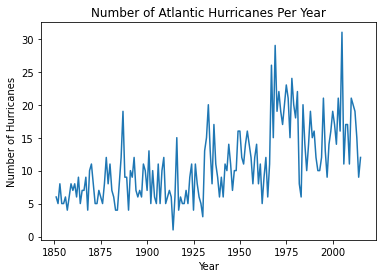

In [ ]:
atlantic_count_df = atlantic_df[['Name', 'ID', 'Date', 'Status', 'Maximum Wind']].astype({'Date': 'str'})
atlantic_count_df['Year'] = atlantic_count_df['Date'].apply(lambda x: pd.to_datetime(x).year)

q_countyear = """ SELECT *, COUNT(YEAR) AS number FROM
(SELECT DISTINCT Name, ID,  Year FROM atlantic_count_df)
GROUP BY Year
"""
atlantic_countyear_df = ps.sqldf(q_countyear)

plt.plot(atlantic_countyear_df['Year'],atlantic_countyear_df['number'])
plt.xlabel("Year")
plt.ylabel("Number of Hurricanes")
plt.title("Number of Atlantic Hurricanes Per Year")
plt.show()

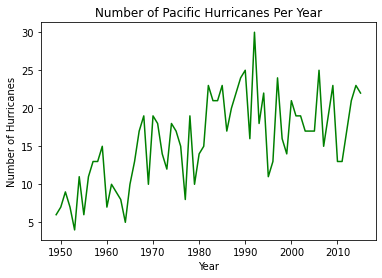

In [ ]:
pacific_count_df = pacific_df[['Name', 'ID','Date', 'Status', 'Maximum Wind']].astype({'Date': 'str'})
pacific_count_df['Year'] = pacific_count_df['Date'].apply(lambda x: pd.to_datetime(x).year)

q_countyearp = """ SELECT *, COUNT(YEAR) AS number FROM
(SELECT DISTINCT Name, ID,  Year FROM pacific_count_df)
GROUP BY Year
"""
pacific_countyear_df = ps.sqldf(q_countyearp)

plt.plot(pacific_countyear_df['Year'],pacific_countyear_df['number'],color='green')
plt.xlabel("Year")
plt.ylabel("Number of Hurricanes")
plt.title("Number of Pacific Hurricanes Per Year")
plt.show()

Now we join on common years to get the graph with global data.

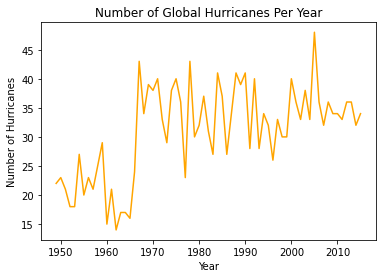

In [ ]:
temp=[atlantic_count_df[atlantic_count_df['Year']>1948],pacific_count_df]
global_count_df=pd.concat(temp)

q_countyearg = """ SELECT *, COUNT(YEAR) AS number FROM
(SELECT DISTINCT Name, ID,  Year FROM global_count_df)
GROUP BY Year
"""
global_countyear_df = ps.sqldf(q_countyearg)

plt.plot(global_countyear_df['Year'],global_countyear_df['number'],color='orange')
plt.xlabel("Year")
plt.ylabel("Number of Hurricanes")
plt.title("Number of Global Hurricanes Per Year")
plt.show()

In [ ]:
global_count_df['Month'] = global_count_df['Date'].apply(lambda x: pd.to_datetime(x).month)
global_countM_df = global_count_df.groupby('Month').count()

Let's see the frequency of hurricanes in each month. Make a decision which months we want to look into.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


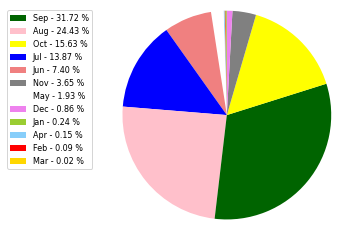

In [ ]:
import numpy as np`
x = np.char.array(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov','Dec'])
y = global_countM_df['ID'].to_numpy()
colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')
plt.title("Typhoon Number Pie Chart")

We can see most hurricanes happen during July to Octbor. 
If the temperatures dont vary significantly during those months, we can use the average temperature to represent that hurricanes happen in a specific year 

#### Hurricane and Global Temperature

In [ ]:
hurricane_month_temp_df=GlobalTemperatures_df[['dt','LandAndOceanAverageTemperature']].dropna()
hurricane_month_temp_df['dt']=pd.to_datetime(hurricane_month_temp_df['dt'])
hurricane_month_temp_df['month']=hurricane_month_temp_df['dt'].dt.month
hurricane_month_temp_df['year']=hurricane_month_temp_df['dt'].dt.year

In [ ]:
#Pick the months in which hurricanes offer occur
hurricane_hfmonth_temp_df = hurricane_month_temp_df[hurricane_month_temp_df['month']<=10]
hurricane_hfmonth_temp_df = hurricane_hfmonth_temp_df[hurricane_hfmonth_temp_df['month']>=7]

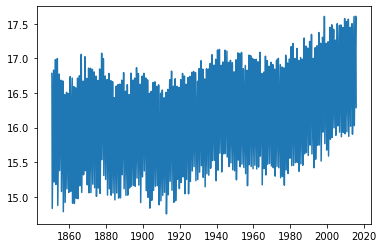

In [ ]:
plt.plot(hurricane_hfmonth_temp_df['dt'],hurricane_hfmonth_temp_df['LandAndOceanAverageTemperature'])
#We can see the tempeture during the period in which hurricanes often occur only vary slightly, which is pretty good.
#So we can simplify our problems in the next steps

In [ ]:
hurricane_hfmonth_temp_df

,dt,LandAndOceanAverageTemperature,month,year
1206,1850-07-01,16.783,7,1850
1207,1850-08-01,16.718,8,1850
1208,1850-09-01,15.886,9,1850
1209,1850-10-01,14.831,10,1850
1218,1851-07-01,16.831,7,1851
...,...,...,...,...
3177,2014-10-01,16.029,10,2014
3186,2015-07-01,17.611,7,2015
3187,2015-08-01,17.589,8,2015
3188,2015-09-01,17.049,9,2015


In [ ]:
hurricane_yeartemp_df=hurricane_hfmonth_temp_df.groupby('year').mean().reset_index()
hurricane_yeartemp_df = hurricane_yeartemp_df.rename(columns={'year':'ye'})

In [ ]:
hurricane_yeartemp_df

,ye,LandAndOceanAverageTemperature,month
0,1850,16.05450,8.5
1,1851,16.18075,8.5
2,1852,16.19150,8.5
3,1853,16.15100,8.5
4,1854,16.23950,8.5
...,...,...,...
161,2011,16.91950,8.5
162,2012,16.94275,8.5
163,2013,16.94100,8.5
164,2014,17.02975,8.5


In [ ]:
qHAT="""
SELECT g.number, h.LandAndOceanAverageTemperature AS Temp
FROM global_countyear_df g
JOIN hurricane_yeartemp_df h ON g.Year = h.ye
ORDER BY Temp ASC
"""
hurricnane_temp_df=ps.sqldf(qHAT)

In [ ]:
hurricnane_temp_df

,number,Temp
0,17,16.14775
1,23,16.17050
2,36,16.22175
3,40,16.26250
4,23,16.27025
...,...,...
62,36,16.94275
63,34,16.94475
64,48,16.95150
65,32,17.02975


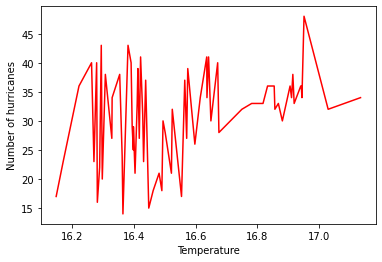

In [ ]:
plt.plot(hurricnane_temp_df['Temp'],hurricnane_temp_df['number'],color='red')
plt.xlabel("Temperature")
plt.ylabel("Number of hurricanes")
plt.show()
#No strong relation...

### Oceanic Zooplankton

This zooplankton dataset is provided by the California Cooperative Oceanic Fisheries Investigations (CalCOFI) with the time period from Jan 1951 to April 2018. 

`GlobalLandTemperaturesByState_df` covers the time period from Jan 1849 to Sep 2013. To analyze with relatively complete data, we use our preprocessed `GlobalLandTemperaturesByState_df` to select the temperature of California from 1951 to 2012.

Focusing on months, we drop rows with NaN values. Then we cast `Tow_Date` column to datetime format and calculate `year` and `month` columns. After grouping by `year` and `month`, we calculate the average zooplankton volumn per month and only keep the `avg_vol` column.
We now get our needed dataframe.

In [ ]:
zoop_extracted_df = zooplankton_df.copy().dropna(axis=1, how='all')
zoop_extracted_df['year'] = pd.to_datetime(zoop_extracted_df['Tow_Date']).dt.year
zoop_extracted_df['month'] = pd.to_datetime(zoop_extracted_df['Tow_Date']).dt.month
zoop_extracted_df = zoop_extracted_df.groupby(['year', 'month']).agg({'Ttl_PVolC3': 'sum', 'Sml_PVolC3': 'count'}).reset_index()
zoop_extracted_df['avg_vol'] = zoop_extracted_df['Ttl_PVolC3'] / zoop_extracted_df['Sml_PVolC3']
zoop_extracted_df = zoop_extracted_df.drop(columns=['Ttl_PVolC3', 'Sml_PVolC3'])
zoop_extracted_df

,year,month,avg_vol
0,1951,1,234.216000
1,1951,2,293.479592
2,1951,3,158.338235
3,1951,4,148.985507
4,1951,5,144.255319
...,...,...,...
437,2017,1,82.746988
438,2017,3,132.250000
439,2017,4,324.384615
440,2018,2,90.511111


For the same reason, we then need to *upsample* again. We create the full years and months and fill `avg_vol` with the average value of two adjacent ones to complement the missing values.

In [ ]:
zoop_full = []
for year in range(1951, 2019):
  for month in range(1, 13):
    zoop_full.append([year, month])
zoop_full_df = pd.DataFrame(zoop_full, columns=['year', 'month'])
zoop_extracted_df = pd.merge(zoop_extracted_df, zoop_full_df, left_on=['year', 'month'], right_on=['year', 'month'], how='right')
zoop_extracted_df['avg_vol'] = zoop_extracted_df.avg_vol.ffill().add(zoop_extracted_df.avg_vol.bfill()).div(2)
zoop_extracted_df = zoop_extracted_df.dropna()
zoop_extracted_df

,year,month,avg_vol
0,1951,1,234.216000
1,1951,2,293.479592
2,1951,3,158.338235
3,1951,4,148.985507
4,1951,5,144.255319
...,...,...,...
803,2017,12,207.447863
804,2018,1,207.447863
805,2018,2,90.511111
806,2018,3,111.706051


Nevertheless, we can still build some interesting regression models if using original data by `year`.

With the background information of the dataset, we only need to filter and use the temperature data of California with it. The column `year` is got by converting the original dt column to datetime.

In [ ]:
Temperature_CA_df = GlobalLandTemperaturesByState_df[GlobalLandTemperaturesByState_df['State'] == 'California'][['dt', 'AverageTemperature']]
Temperature_CA_df['dt'] = pd.to_datetime(Temperature_CA_df['dt']).dt.year
Temperature_CA_df = Temperature_CA_df.rename({'dt': 'year'}, axis=1)
Temperature_CA_df = Temperature_CA_df[(1951 <= Temperature_CA_df['year']) & (Temperature_CA_df['year'] <= 2012)]
Temperature_CA_df = Temperature_CA_df.groupby('year').mean().reset_index()
Temperature_CA_df

,year,AverageTemperature
0,1951,14.221583
1,1952,14.001750
2,1953,14.236000
3,1954,14.456667
4,1955,13.687500
...,...,...
57,2008,15.071167
58,2009,15.004250
59,2010,14.408167
60,2011,14.265750


And we only keep columns of `tow_year`, `Ttl_PVolC3`, and `Sml_PVolC3` in `zoop_vol_df`.

In [ ]:
zoop_vol_df = zooplankton_df.copy().dropna(axis=1, how='all')
zoop_vol_df['Tow_Date'] = pd.to_datetime(zoop_vol_df['Tow_Date']).dt.year
zoop_vol_df = zoop_vol_df.rename({'Tow_Date': 'tow_year'}, axis=1)
zoop_vol_df = zoop_vol_df[['tow_year', 'Ttl_PVolC3', 'Sml_PVolC3']]
zoop_vol_df

,tow_year,Ttl_PVolC3,Sml_PVolC3
0,1951,39.0,39.0
1,1951,70.0,70.0
2,1951,125.0,125.0
3,1951,3199.0,26.0
4,1951,920.0,920.0
...,...,...,...
49938,2018,133.0,133.0
49939,2018,NaN,NaN
49940,2018,124.0,124.0
49941,2018,NaN,NaN


Since the percentage of small zooplankton `Sml_PVolC3` in total volume `Ttl_PVolC3` varies greatly, we group by `year` and focus on the quantity of its total volume in this case to get a better regression model.

In [ ]:
zoop_vol_df = zoop_vol_df.groupby(zoop_vol_df['tow_year']).agg({'Ttl_PVolC3': 'sum', 'Sml_PVolC3': 'count'}).reset_index()
zoop_vol_df.columns = ['tow_year', 'total_vol', 'times']
zoop_vol_df

,tow_year,total_vol,times
0,1951,228863.0,1373
1,1952,364804.0,1527
2,1953,525933.0,1435
3,1954,282798.0,1473
4,1955,434632.0,1312
...,...,...,...
59,2014,36795.0,253
60,2015,34565.0,308
61,2016,40189.0,271
62,2017,37974.0,186


From the dataframes above, we join the two via the year and calculate the average total volume per year.

In [ ]:
zoop_joined_df = pd.merge(Temperature_CA_df, zoop_vol_df, left_on='year', right_on='tow_year')
zoop_joined_df['AverageTotalVol'] = zoop_joined_df['total_vol'] / zoop_joined_df['times']
zoop_joined_df = zoop_joined_df.drop(columns=['tow_year', 'total_vol', 'times'])
zoop_joined_df

,year,AverageTemperature,AverageTotalVol
0,1951,14.221583,166.688274
1,1952,14.001750,238.902423
2,1953,14.236000,366.503833
3,1954,14.456667,191.987780
4,1955,13.687500,331.274390
5,1956,14.096000,789.397017
6,1957,14.203083,265.490604
7,1958,15.185917,83.509023
8,1959,15.155833,103.991751
9,1960,14.671250,164.653804


Now we can apply some regression models to see the relationship between average total volume and average temperature.

We starts with a scatter plot.

(Ref: [CALCOFI Linear Regression Models](https://www.kaggle.com/eduardolpezluis/calcofi-linear-regression-models/notebook))

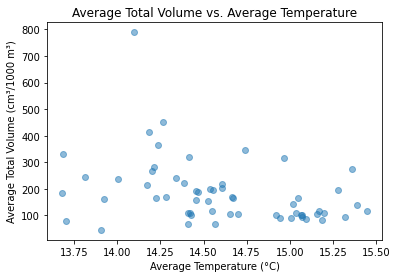

In [ ]:
from sklearn.impute import SimpleImputer

linear_data = zoop_joined_df[['AverageTemperature', 'AverageTotalVol']]
linear_data = SimpleImputer().fit_transform(linear_data)
X = linear_data[:,0].reshape(-1, 1)
y = linear_data[:,1]
plt.scatter(X, y, alpha=0.5)
plt.title('Average Total Volume vs. Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Total Volume (cm³/1000 m³)')
plt.show()

#### Linear Regression
We define the following functions for returning model results and plotting models.

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def model_results(model, X_train, X_test, y_train, y_test):
  model = model.fit(X_train, y_train)
  preds = model.predict(X_test)
  return model.coef_, model.intercept_, preds

def plot_model(model_name, model, X_train, X_test, y_train, y_test):
  a, b, preds = model_results(model, X_train, X_test, y_train, y_test)
  # legend text box
  fig, ax = plt.subplots()
  textstr = '\n'.join((r'$\mathrm{Mean}\;\mathrm{Absolute}\;\mathrm{Value}=%.2f$' % (mean_absolute_error(y_test, preds),),
                       r'$R^2=%.2f$' % (r2_score(y_test, preds),),
                       r'$\mathrm{Coeff}=%.2f$' % (a,),
                       r'$\mathrm{Intercept}=%.2f$' % (b,)))
  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
  ax.text(0.01, 0.01, textstr, transform=ax.transAxes, verticalalignment='bottom', bbox=props)
  # linear regression line
  x = list(range(12,17))
  ax.scatter(X, y, alpha=0.5)
  ax.plot(x, a*x + b, label=model_name)
  # scatter
  plt.title('Average Total Volume vs. Average Temperature')
  plt.xlabel('Average Temperature (°C)')
  plt.ylabel('Average Total Volume (cm³/1000 m³)')
  plt.legend()
  return a, b

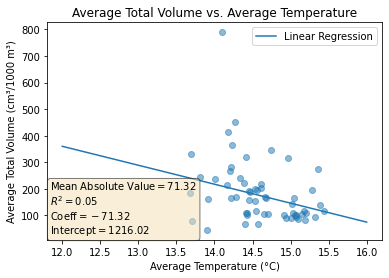

In [ ]:
from sklearn.linear_model import LinearRegression
linear_a, linear_b = plot_model('Linear Regression', LinearRegression(), X_train, X_test, y_train, y_test)

#### Ridge Regression

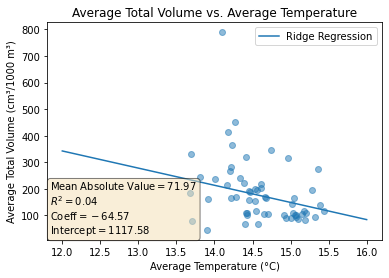

In [ ]:
from sklearn.linear_model import Ridge
ridge_a, ridge_b = plot_model('Ridge Regression', Ridge(alpha=1, solver='cholesky'), X_train, X_test, y_train, y_test)

#### Lasso Regression

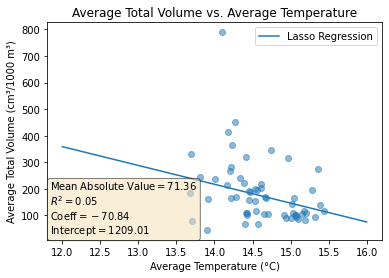

In [ ]:
from sklearn.linear_model import Lasso
lasso_a, lasso_b = plot_model('Lasso Regression', Lasso(alpha=0.1), X_train, X_test, y_train, y_test)

#### Elastic Net Regression

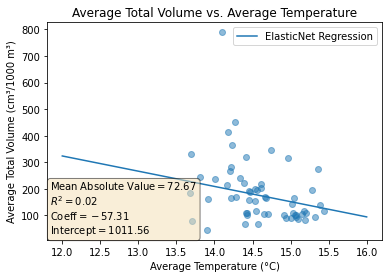

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_a, elsatic_b = plot_model('ElasticNet Regression', ElasticNet(alpha=0.1, l1_ratio=0.5), X_train, X_test, y_train, y_test)

Finally, we get a plot that combines the four ways of linear regression above.

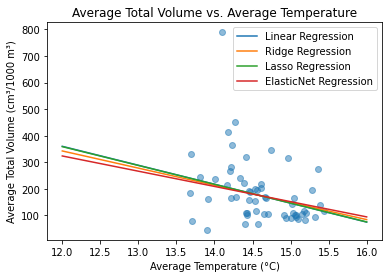

In [ ]:
x = list(range(12,17))
plt.scatter(linear_data[:,0], linear_data[:,1], alpha=0.5)
plt.plot(x, linear_a * x + linear_b, label='Linear Regression')
plt.plot(x, ridge_a * x + ridge_b, label='Ridge Regression')
plt.plot(x, lasso_a * x + lasso_b, label='Lasso Regression')
plt.plot(x, elastic_a * x + elsatic_b, label='ElasticNet Regression')
plt.title('Average Total Volume vs. Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Total Volume (cm³/1000 m³)')
plt.legend()

## Feature Engineering and Modeling
Based on previous parts, now we can get the joined dataframe with processed `GlobalTemperatures_extracted_df`, `sea_levels_extracted_df`, `elevation_changed_extracted_df`, `hurricanes_joined_df`, and `zoop_extracted_df`.

In [ ]:
from functools import reduce
natural_dfs = [GlobalTemperatures_extracted_df, sea_levels_extracted_df, elevation_changed_extracted_df, hurricanes_joined_df, zoop_extracted_df]
natural_joined_df = reduce(lambda left, right: pd.merge(left, right, on=['year', 'month']), natural_dfs)
natural_joined_df

,LandAverageTemperature,LandAndOceanAverageTemperature,year,month,GMSL,ELEVATION_CHANGE,hurricanes_count,Maximum Wind,avg_vol
0,2.138,13.341,1951,1,-60.9,-47400.0,1.0,55.0,234.216000
1,2.332,13.488,1951,2,-56.9,-47400.0,0.0,0.0,293.479592
2,5.091,14.278,1951,3,-51.6,-47400.0,0.0,0.0,158.338235
3,8.367,15.198,1951,4,-51.0,-47400.0,0.0,0.0,148.985507
4,11.438,16.158,1951,5,-50.7,-47400.0,2.0,80.0,144.255319
...,...,...,...,...,...,...,...,...,...
751,14.742,17.462,2013,8,71.6,-11915616.0,10.0,90.0,478.367720
752,13.154,16.894,2013,9,68.8,-12288837.0,7.0,80.0,478.367720
753,10.256,15.905,2013,10,66.4,-2994500.0,6.0,55.0,478.367720
754,7.424,15.107,2013,11,59.7,-193465.0,3.0,110.0,97.594595


### Correlation Table and Heatmap
We create a correlation table and heatmap for the features in `natural_joined_df` with seaborn library already imported.

In [ ]:
natural_joined_corr = natural_joined_df.corr()
natural_joined_corr

,LandAverageTemperature,LandAndOceanAverageTemperature,year,month,GMSL,ELEVATION_CHANGE,hurricanes_count,Maximum Wind,avg_vol
LandAverageTemperature,1.000000,0.992751,0.079084,0.262079,0.087739,-0.045475,0.623199,0.663466,0.224031
LandAndOceanAverageTemperature,0.992751,1.000000,0.154108,0.203761,0.163890,-0.070992,0.608501,0.637833,0.207587
year,0.079084,0.154108,1.000000,0.000000,0.969108,-0.269478,0.111633,0.097267,-0.139605
month,0.262079,0.203761,0.000000,1.000000,0.012725,0.047452,0.421924,0.527225,-0.016062
GMSL,0.087739,0.163890,0.969108,0.012725,1.000000,-0.339223,0.107270,0.102747,-0.130003
ELEVATION_CHANGE,-0.045475,-0.070992,-0.269478,0.047452,-0.339223,1.000000,-0.015983,0.000531,-0.230516
hurricanes_count,0.623199,0.608501,0.111633,0.421924,0.107270,-0.015983,1.000000,0.818059,0.026803
Maximum Wind,0.663466,0.637833,0.097267,0.527225,0.102747,0.000531,0.818059,1.000000,0.035206
avg_vol,0.224031,0.207587,-0.139605,-0.016062,-0.130003,-0.230516,0.026803,0.035206,1.000000


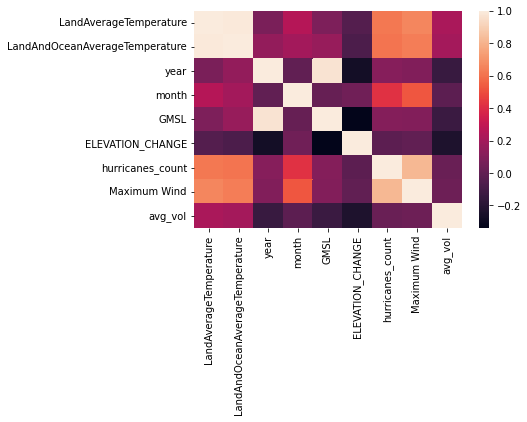

In [ ]:
sns.heatmap(natural_joined_corr)

We set another column `above_average` where the value is 1 if `LandAndOceanAverageTemperature` is above the average of the original column values from the year 1951 to 2013 (the overlapped year period after the final join operation). If not, assign it to 0.

In [ ]:
LandAndOceanAverageTemperature = GlobalTemperatures_extracted_df[(GlobalTemperatures_extracted_df['year'] >= 1951) &
                                                                 (GlobalTemperatures_extracted_df['year'] <= 2013)]['LandAndOceanAverageTemperature'].mean()
LandAndOceanAverageTemperature

15.478115079365072

In [ ]:
natural_joined_df['above_average'] = [1 if temp > LandAndOceanAverageTemperature else 0 for temp in natural_joined_df['LandAndOceanAverageTemperature']]
natural_joined_df = natural_joined_df.drop(columns='LandAndOceanAverageTemperature')
natural_joined_df

,LandAverageTemperature,year,month,GMSL,ELEVATION_CHANGE,hurricanes_count,Maximum Wind,avg_vol,above_average
0,2.138,1951,1,-60.9,-47400.0,1.0,55.0,234.216000,0
1,2.332,1951,2,-56.9,-47400.0,0.0,0.0,293.479592,0
2,5.091,1951,3,-51.6,-47400.0,0.0,0.0,158.338235,0
3,8.367,1951,4,-51.0,-47400.0,0.0,0.0,148.985507,0
4,11.438,1951,5,-50.7,-47400.0,2.0,80.0,144.255319,1
...,...,...,...,...,...,...,...,...,...
751,14.742,2013,8,71.6,-11915616.0,10.0,90.0,478.367720,1
752,13.154,2013,9,68.8,-12288837.0,7.0,80.0,478.367720,1
753,10.256,2013,10,66.4,-2994500.0,6.0,55.0,478.367720,1
754,7.424,2013,11,59.7,-193465.0,3.0,110.0,97.594595,0


### Modeling with Features and Labels
We get features and labels from `natural_joined_df`.

In [ ]:
features = natural_joined_df[['year', 'month', 'LandAverageTemperature', 'GMSL', 'ELEVATION_CHANGE', 'hurricanes_count', 'Maximum Wind', 'avg_vol']]
labels = natural_joined_df['above_average']

We split data into train and test sets to apply different machine learning models.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

#### Naive Bayes Classifier
We use the `GaussianNB` package in sklearn to perform Naive Bayes classification. Then we print its accuracy.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes (GaussianNB) model 
clf = GaussianNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)
# accuracy 
naive_bayes_acc = clf.score(X_test, y_test)
print(naive_bayes_acc)

0.7236842105263158


#### Dimensionality Reduction with PCA
We use `StandardScaler` fit a pca model on our train set and then transform and plot its `explained_variance_ratio`.

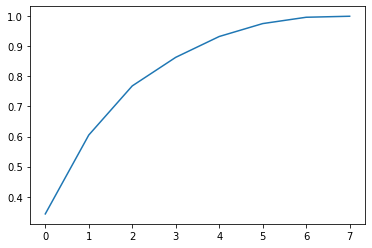

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)
# find num components to use
pca = PCA(n_components=8)
pca.fit(X_train_scaled)
# plot for explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))

We use the plot to decide the number of components to keep, choosing a number that explains the sufficient of variance in the dataset (which is at least 99.95% and the number is **6** in this figure). Then fit and transform this PCA on training set using this number of components.

We overwrite `X_train` and `X_test` with the transformed versions.

To visualize what is going on, we use PCA to reduce the number dimensions to 2.

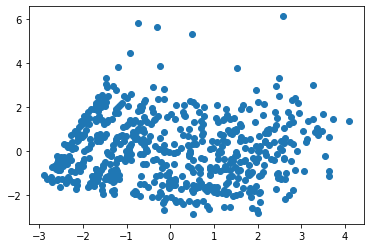

In [ ]:
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train_scaled)
X_test = pca.transform(X_test_scaled)

# visualize 2 components of PCA
pca_plot = PCA(n_components=2)
comp = pca_plot.fit_transform(X_train)
data = np.transpose(np.array(comp))
plt.scatter(data[0], data[1])

#### Random Forest
In this part, we use grid search and train a random forest model on the transformed train dataset. We tune hyperparameters that are available like depth and number of estimators using grid search and select the best hyperparameters out of those.

First, we define a function to print out the best parameters.


In [ ]:
def print_best_params(results):
    print('best_params: {}\n'.format(results.best_params_))

Then we try with different ranges of `n_estimators` and `max_depth` to get the best parameters located within them.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid_param= {'n_estimators': range(1, 31, 1), 'max_depth': range(1, 41, 1)}
rf_cv = GridSearchCV(RandomForestClassifier(), grid_param, cv=5).fit(X_train, y_train)
print_best_params(rf_cv)

best_params: {'max_depth': 8, 'n_estimators': 28}



We fit the random forest on the training data using the parameters computed above. Then we can just make predictions on the test set, report the root mean squared error for the test set.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
y_pred = RandomForestRegressor(n_estimators=28, max_depth=8).fit(X_train, y_train).predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred.astype(int))
print(test_accuracy)

0.9078947368421053


This accuracy is greatly improved from what Naive Bayes provides.

## Droughts

This US droughts dataset covers the time period from 2000 to 2015. We will also preprocess `us_droughts_df` to extract some features at first. Then, we will choose the same time period of `GlobalLandTemperaturesByState_df` and join on common states.

In [ ]:
us_droughts_extracted_df = us_droughts_df.copy()
us_droughts_extracted_df['validStart'] = pd.to_datetime(us_droughts_extracted_df['validStart'])
us_droughts_extracted_df['validEnd'] = pd.to_datetime(us_droughts_extracted_df['validEnd'])
us_droughts_extracted_df['year'] = pd.to_datetime(us_droughts_extracted_df['validStart']).dt.year
us_droughts_extracted_df['month'] = pd.to_datetime(us_droughts_extracted_df['validStart']).dt.month
us_droughts_extracted_df['duration'] = (us_droughts_extracted_df['validEnd'] - us_droughts_extracted_df['validStart']).dt.days
us_droughts_extracted_df = us_droughts_extracted_df[['state', 'year', 'month', 'duration']]
us_droughts_extracted_df

,state,year,month,duration
0,AK,2000,11,6
1,AK,2000,10,6
2,AK,2000,10,6
3,AK,2000,10,6
4,AK,2000,10,6
...,...,...,...,...
2829496,WY,2015,12,6
2829497,WY,2015,12,6
2829498,WY,2015,11,6
2829499,WY,2015,11,6


It looks like the duration column are all 6.

In [ ]:
us_droughts_extracted_df[us_droughts_extracted_df['duration'] != 6]

,state,year,month,duration


We need a Python Dictionary to translate Two letter codes to US States.

In [ ]:
us_abbr_to_state = {"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"}

So, we omit the column and group by state, year, and month.

In [ ]:
us_droughts_extracted_df = us_droughts_extracted_df.groupby(['state', 'year', 'month'])['duration'].count().reset_index()
us_droughts_extracted_df = us_droughts_extracted_df.rename(columns={'duration': 'count'})
us_droughts_extracted_df = us_droughts_extracted_df.replace({'state': us_abbr_to_state})
us_droughts_extracted_df

,state,year,month,count
0,Alaska,2000,1,108
1,Alaska,2000,2,135
2,Alaska,2000,3,108
3,Alaska,2000,4,108
4,Alaska,2000,5,135
...,...,...,...,...
10551,Wyoming,2016,7,92
10552,Wyoming,2016,8,115
10553,Wyoming,2016,9,92
10554,Wyoming,2016,10,92


In [ ]:
Temperature_state_df = GlobalLandTemperaturesByState_df[GlobalLandTemperaturesByState_df['Country'] == 'United States']
Temperature_state_df['dt'] = pd.to_datetime(Temperature_state_df['dt'])
Temperature_state_df['year'] = Temperature_state_df['dt'].dt.year
Temperature_state_df['month'] = Temperature_state_df['dt'].dt.month
Temperature_state_df = Temperature_state_df[['year', 'month', 'AverageTemperature', 'State']]
Temperature_state_df = Temperature_state_df[(2000 <= Temperature_state_df['year']) & (Temperature_state_df['year'] <= 2015)]
Temperature_state_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,year,month,AverageTemperature,State
10532,2000,1,8.274,Alabama
10533,2000,2,11.476,Alabama
10534,2000,3,15.244,Alabama
10535,2000,4,16.032,Alabama
10536,2000,5,23.743,Alabama
...,...,...,...,...
626435,2013,5,10.607,Wyoming
626436,2013,6,16.267,Wyoming
626437,2013,7,20.222,Wyoming
626438,2013,8,19.621,Wyoming


Now we can group by year, month, and state and do the join task.

In [ ]:
us_droughts_joined_df = pd.merge(Temperature_state_df, us_droughts_extracted_df, left_on=['year', 'month', 'State'], right_on=['year', 'month', 'state'])
us_droughts_joined_df = us_droughts_joined_df.drop(columns='state')
us_droughts_joined_df

,year,month,AverageTemperature,State,count
0,2000,1,8.274,Alabama,268
1,2000,2,11.476,Alabama,335
2,2000,3,15.244,Alabama,268
3,2000,4,16.032,Alabama,268
4,2000,5,23.743,Alabama,335
...,...,...,...,...,...
8080,2013,5,10.607,Wyoming,92
8081,2013,6,16.267,Wyoming,92
8082,2013,7,20.222,Wyoming,115
8083,2013,8,19.621,Wyoming,92


### Visualization by Filling Colors on Map
To do this, we need to install Cartopy.

In [ ]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip uninstall -y shapely
!pip install shapely --no-binary shapely

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (104 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state 

Then we concentrate on the number of droughts and mean temperature.

In [ ]:
us_droughts_grouped_df = us_droughts_joined_df.groupby('State').sum().reset_index()
us_droughts_grouped_df = us_droughts_grouped_df[['State', 'count']]
us_droughts_grouped_df

,State,count
0,Alabama,48039
1,Alaska,19359
2,Arizona,10755
3,Arkansas,53775
4,California,41586
5,Colorado,45888
6,Connecticut,5736
7,Delaware,2151
8,Florida,48039
9,Hawaii,3585


Converting the dataframe above to a dictionary, now we can plot.

(Ref: [Cartopy shapefile for Greenland producing Polygon](https://stackoverflow.com/questions/66484252/cartopy-shapefile-for-greenland-producing-polygon))

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_1_states_provinces_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed

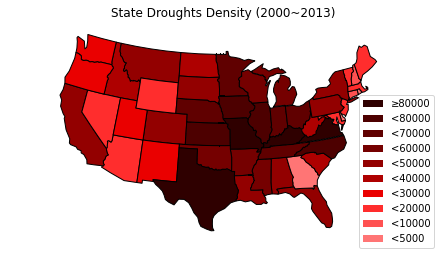

In [ ]:
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

fig = plt.figure()
# to get the effect of having just the states without a map "background"
# turn off the background patch and axes frame
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(), frameon=False)
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)
popdensity = us_droughts_grouped_df.set_index('State').to_dict()['count']
ax.patch.set_visible(False)
ax.set_title('State Droughts Density (2000~2013)')

for astate in shpreader.Reader(states_shp).records():

  edgecolor = 'black'

  try:
    astate.attributes['name'] = astate.attributes['name'].replace('\x00','')
    state_dens = popdensity[astate.attributes['name']]
  except:
    state_dens = 0

  # simple scheme to assign color to each state
  if state_dens < 5000:
    facecolor = "#FF7575"
  elif state_dens < 10000:
    facecolor = "#FF5151"
  elif state_dens < 20000:
    facecolor = "#FF2D2D"
  elif state_dens < 30000:
    facecolor = "#EA0000"
  elif state_dens < 40000:
    facecolor = "#AE0000"
  elif state_dens < 50000:
    facecolor = "#930000"
  elif state_dens < 60000:
    facecolor = "#750000"
  elif state_dens < 70000:
    facecolor = "#600000"
  elif state_dens < 80000:
    facecolor = "#4D0000"
  else:
    facecolor = "#2F0000"

  ax.add_geometries([astate.geometry], ccrs.PlateCarree(), facecolor=facecolor, edgecolor=edgecolor)

# create legend
less_than_5000 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7575")
less_than_10000 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF5151")
less_than_20000 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF2D2D")
less_than_30000 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#EA0000")
less_than_40000 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#AE0000")
less_than_50000 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#930000")
less_than_60000 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#750000")
less_than_70000 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#600000")
less_than_80000 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#4D0000")
geq_80000 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#2F0000")

labels = ['≥80000', '<80000', '<70000', '<60000', '<50000', '<40000', '<30000', '<20000', '<10000', '<5000']
ax.legend([geq_80000, less_than_80000, less_than_70000, less_than_60000, less_than_50000,
           less_than_40000, less_than_30000, less_than_20000, less_than_10000, less_than_5000], labels, loc='lower right', fancybox=True)

plt.show()

Likewise, we plot for average temperatures of each state during these years.

In [ ]:
us_temp_grouped_df = us_droughts_joined_df.groupby('State').mean().reset_index()
us_temp_grouped_df = us_temp_grouped_df[['State', 'AverageTemperature']]
us_temp_grouped_df

,State,AverageTemperature
0,Alabama,17.982018
1,Alaska,-3.492543
2,Arizona,16.309824
3,Arkansas,16.584570
4,California,15.080564
5,Colorado,7.952455
6,Connecticut,10.438182
7,Delaware,13.131552
8,Florida,22.267382
9,Hawaii,22.972122


/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


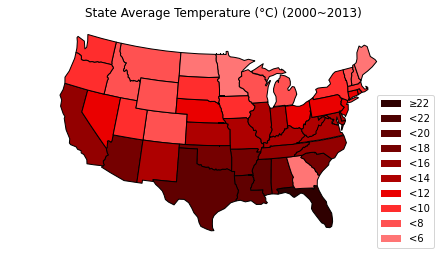

In [ ]:
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom

fig = plt.figure()
# to get the effect of having just the states without a map "background"
# turn off the background patch and axes frame
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(), frameon=False)
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)
ax.patch.set_visible(False)
ax.set_title('State Average Temperature (°C) (2000~2013)')

popdensity = us_temp_grouped_df.set_index('State').to_dict()['AverageTemperature']

for astate in shpreader.Reader(states_shp).records():

  edgecolor = 'black'

  try:
    astate.attributes['name'] = astate.attributes['name'].replace('\x00','')
    state_dens = popdensity[astate.attributes['name']]
  except:
    state_dens = 0

  # simple scheme to assign color to each state
  if state_dens < 6:
    facecolor = "#FF7575"
  elif state_dens < 8:
    facecolor = "#FF5151"
  elif state_dens < 10:
    facecolor = "#FF2D2D"
  elif state_dens < 12:
    facecolor = "#EA0000"
  elif state_dens < 14:
    facecolor = "#AE0000"
  elif state_dens < 16:
    facecolor = "#930000"
  elif state_dens < 18:
    facecolor = "#750000"
  elif state_dens < 20:
    facecolor = "#600000"
  elif state_dens < 22:
    facecolor = "#4D0000"
  else:
    facecolor = "#2F0000"

  ax.add_geometries([astate.geometry], ccrs.PlateCarree(), facecolor=facecolor, edgecolor=edgecolor)

# create legend
less_than_6 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7575")
less_than_8 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF5151")
less_than_10 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF2D2D")
less_than_12 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#EA0000")
less_than_14 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#AE0000")
less_than_16 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#930000")
less_than_18 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#750000")
less_than_20 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#600000")
less_than_22 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#4D0000")
geq_22 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#2F0000")

labels = ['≥22', '<22', '<20', '<18', '<16', '<14', '<12', '<10', '<8', '<6']
ax.legend([geq_22, less_than_22, less_than_20, less_than_18, less_than_16,
           less_than_14, less_than_12, less_than_10, less_than_8, less_than_6], labels, loc='lower right', fancybox=True)

plt.show()

We can see many similarities between the two figures.

### Regression (Elastic Net) - Good

We do a elastic net regression for average temperature and the number of droughts.

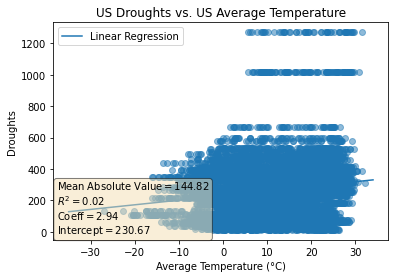

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet

linear_data = us_droughts_joined_df[['AverageTemperature', 'count']]
linear_data = SimpleImputer().fit_transform(linear_data)
X = linear_data[:,0].reshape(-1, 1)
y = linear_data[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modeling and predicting
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model = model.fit(X_train, y_train)
preds = model.predict(X_test)
a = model.coef_
b = model.intercept_

# legend text box
fig, ax = plt.subplots()
textstr = '\n'.join((r'$\mathrm{Mean}\;\mathrm{Absolute}\;\mathrm{Value}=%.2f$' % (mean_absolute_error(y_test, preds),),
                     r'$R^2=%.2f$' % (r2_score(y_test, preds),),
                     r'$\mathrm{Coeff}=%.2f$' % (a,),
                     r'$\mathrm{Intercept}=%.2f$' % (b,)))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.01, 0.01, textstr, transform=ax.transAxes, verticalalignment='bottom', bbox=props)
# linear regression line
x = list(range(-35, 35))
ax.scatter(X, y, alpha=0.5)
ax.plot(x, a*x + b, label='Linear Regression')
# scatter
plt.title('US Droughts vs. US Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Droughts')
plt.legend()

## Gross Domestic Product (GDP)

### Connection between Temperature and GDP

To use `GDP_Data_Year_1_df`, we need to transpose first, and rename and drop some of columns then.

Noticing that the column names contain whitespaces, we need additional strip operations so that we can select columns by name afterward.

In [ ]:
#Transpose the dataframe
GDP_transposed_df = GDP_Data_Year_1_df.transpose().reset_index()
GDP_transposed_df.columns = GDP_transposed_df.iloc[0,:]
GDP_transposed_df.columns.name = None
GDP_transposed_df = GDP_transposed_df.reset_index()
GDP_transposed_df = GDP_transposed_df.rename(columns=lambda x: x.strip())

In [ ]:
#rename and drop
GDP_transposed_df = GDP_transposed_df.drop(index = [0]).drop(columns=['index'])
GDP_transposed_df = GDP_transposed_df.rename(columns={'Country': 'year'}).astype({'year':'int'})
GDP_transposed_df = GDP_transposed_df[GDP_transposed_df['year']>1850]
GDP_transposed_df

,year,Austria,Belgium,Denmark,Finland,France,Germany,Italy,Netherlands,Norway,Sweden,Switzerland,United Kingdom,Ireland,Greece,Portugal,Spain,Australia,New Zealand,Canada,United States,Albania,Bulgaria,Czechoslovakia,Hungary,Poland,Romania,Yugoslavia,Bosnia,Croatia,Macedonia,Slovenia,Serbia,Czech Republic,Slovakia,Armenia,Azerbaijan,Belarus,Estonia,Georgia,...,Cote dIvoire,Djibouti,Egypt,Equatorial Guinea,Eritrea and Ethiopia,Gabon,Gambia,Ghana,Guinea,Guinea Bissau,Kenya,Lesotho,Liberia,Libya,Madagascar,Malawi,Mali,Mauritania,Mauritius,Morocco,Mozambique,Namibia,Niger,Nigeria,Rwanda,Sao Tome and Principe,Senegal,Seychelles,Sierra Leone,Somalia,South Africa,Sudan,Swaziland,Tanzania,Togo,Tunisia,Uganda,Zaire,Zambia,Zimbabwe
37,1851,NaN,"8,442","2,521",NaN,"57,188","47,941",NaN,"7,551","1,429","3,525","3,633","66,037",NaN,NaN,"3,793","16,311","1,491",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,1852,NaN,"8,668","2,615",NaN,"60,931","48,890",NaN,"7,642","1,429","3,476","3,863","67,160",NaN,NaN,NaN,"17,053","1,952",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,1853,NaN,"8,894","2,626",NaN,"57,969","48,653",NaN,"7,578","1,509","3,527","3,729","69,631",NaN,NaN,NaN,"17,192","2,393",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,1854,NaN,"9,444","2,638",NaN,"60,763","49,840",NaN,"7,790","1,567","3,608","3,314","71,428",NaN,NaN,NaN,"17,506","2,338",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,1855,NaN,"9,509","2,930",NaN,"59,842","49,128",NaN,"7,941","1,669","3,861","3,873","71,203",NaN,NaN,"3,552","18,391","2,459",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2004,"176,795","225,609","127,175","112,500","1,329,614","1,589,449","1,120,504","368,824","122,439","200,316","169,781","1,331,721","100,745","152,462","147,841","708,466","472,265","71,790","769,405","8,738,865","11,849","50,785","158,701","85,761","317,349","85,241","127,410","26,682","33,931","6,981","29,880","29,936","106,318","52,383","22,052","29,644","84,943","20,978","20,157",...,"20,720",528,"237,546","9,052","49,865","5,029","1,434","30,197","5,459",839,"33,968","3,508","2,010","14,127","11,711","7,892","11,527","3,275","15,574","98,820","34,140","8,011","5,850","175,618","7,528",242,"16,743",456,"3,420","7,432","195,473","44,021","3,191","22,719","3,275","51,991","22,729","12,898","7,836","12,301"
191,2005,"181,215","230,572","130,227","115,650","1,354,877","1,600,575","1,128,348","376,200","125,745","206,926","174,195","1,361,019","106,991","156,883","149,172","733,971","485,488","73,800","792,487","9,009,770","12,536","53,934","168,804","89,190","328,773","88,736","133,295","27,723","35,356","7,267","31,165","31,784","

Take United States as an example, let's see if their development (observed through GDP) change with the climate.

We select columns `year` and `United States` to save as a new dataframe `GDP_US_df`, then fill its NaN columns with the average of adjacent values and rename `United States` column as `GDP`. Finally, we drop the trailing NaN values.

In [ ]:
GDP_US_df = GDP_transposed_df[['year', 'United States']]
GDP_US_df = GDP_US_df.rename(columns={'United States': 'GDP'})
GDP_US_df['year'] = GDP_US_df['year'].astype(int)
GDP_US_df['GDP'] = GDP_US_df['GDP'].str.replace(',', '').astype(float)
GDP_US_df['GDP'] = GDP_US_df.GDP.ffill().add(GDP_US_df.GDP.bfill()).div(2)
GDP_US_df = GDP_US_df.dropna()
GDP_US_df

,year,GDP
46,1860,69346.0
47,1861,83860.0
48,1862,83860.0
49,1863,83860.0
50,1864,83860.0
...,...,...
190,2004,8738865.0
191,2005,9009770.0
192,2006,9253034.0
193,2007,9447347.0


We plot and see its clear rising trend.

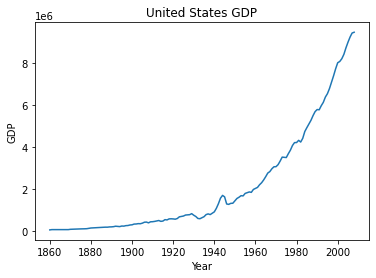

In [ ]:
plt.plot(GDP_US_df['year'], GDP_US_df['GDP'], label='GDP with year')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('United States GDP')
plt.show()

Recall that we have already got the `Temperature_US_df`. Now we convert its column `dt` to generate `year` and only select `year` and `AverageTemperature` as the new dataframe. Since the original dt are based on each month, we need to group by `year` to get the mean of `AverageTemperature`.

In [ ]:
Temperature_US_df['year'] = Temperature_US_df['dt'].dt.year
Temperature_US_df = Temperature_US_df[['year', 'AverageTemperature']]
Temperature_US_df = Temperature_US_df.groupby('year').mean().reset_index()
Temperature_US_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,year,AverageTemperature
0,1768,5.572750
1,1769,10.446500
2,1770,NaN
3,1771,NaN
4,1772,NaN
...,...,...
241,2009,9.137083
242,2010,9.505583
243,2011,9.549917
244,2012,10.261083


We do inner join on the common years.

In [ ]:
GDP_US_joined_df = pd.merge(Temperature_US_df, GDP_US_df, left_on='year', right_on='year', how='inner')
GDP_US_joined_df

,year,AverageTemperature,GDP
0,1860,8.580917,69346.0
1,1861,8.650500,83860.0
2,1862,8.214000,83860.0
3,1863,8.446250,83860.0
4,1864,8.381083,83860.0
...,...,...,...
144,2004,9.667500,8738865.0
145,2005,9.892667,9009770.0
146,2006,9.974500,9253034.0
147,2007,9.837500,9447347.0


### Regression (Elastic Net) - Not Good

We do a elastic net regression for average temperature and GDP.

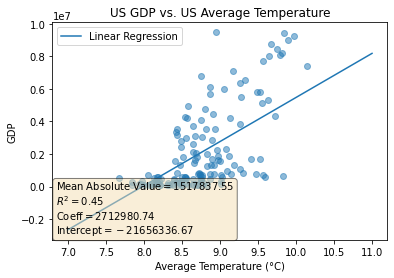

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet

linear_data = GDP_US_joined_df[['AverageTemperature', 'GDP']]
linear_data = SimpleImputer().fit_transform(linear_data)
X = linear_data[:,0].reshape(-1, 1)
y = linear_data[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modeling and predicting
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model = model.fit(X_train, y_train)
preds = model.predict(X_test)
a = model.coef_
b = model.intercept_

# legend text box
fig, ax = plt.subplots()
textstr = '\n'.join((r'$\mathrm{Mean}\;\mathrm{Absolute}\;\mathrm{Value}=%.2f$' % (mean_absolute_error(y_test, preds),),
                     r'$R^2=%.2f$' % (r2_score(y_test, preds),),
                     r'$\mathrm{Coeff}=%.2f$' % (a,),
                     r'$\mathrm{Intercept}=%.2f$' % (b,)))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.01, 0.01, textstr, transform=ax.transAxes, verticalalignment='bottom', bbox=props)
# linear regression line
x = list(range(7, 12))
ax.scatter(X, y, alpha=0.5)
ax.plot(x, a*x + b, label='Linear Regression')
# scatter
plt.title('US GDP vs. US Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('GDP')
plt.legend()

The value of $R^2$ shows that the regression model is not so good. We deduce that part of the reason is that the GDP is affected by too many reasons apart from the temperature, leading to its rising speed surpassing that of US temperature.

## Twitter Climate Change Sentiment

In this section, we are going to explore the datasets of twitter posts related to Global warming and climate change. The collection of tweets are separated into 4 groups representing different opinon on the cause of climate change. We then combine the methods of sentiment analysis and word tokenization to find out if there are any trends and patterns underlying the posts from different groups.

In [ ]:
# download afinn toolbox for sentiment analysis
!pip install afinn

     |████████████████████████████████| 52 kB 902 kB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=aed5871f305ae6eb002b49b8d31ac6c587d6b9e842a3805de4ca170112de05d5
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [ ]:
import nltk
from nltk.corpus import stopwords
from afinn import Afinn
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from collections import Counter
import re

This dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were annotated. Each tweet is labelled independently by 3 reviewers. This dataset only contains tweets that all 3 reviewers agreed on (the rest were discarded).

Each tweet is labelled as one of the following classes:

2(News): the tweet links to factual news about climate change

1(Pro): the tweet supports the belief of man-made climate change

0(Neutral): the tweet neither supports nor refutes the belief of man-made climate change

-1(Anti): the tweet does not believe in man-made climate change

In [ ]:
twitter_sentiment_data_df.head(20)

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153
5,0,Unamshow awache kujinga na iko global warming ...,793125429418815489
6,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125430236684289
7,2,RT @CCIRiviera: Presidential Candidate #Donald...,793126558688878592
8,0,RT @AmericanIndian8: Leonardo DiCaprio's clima...,793127097854197761
9,1,#BeforeTheFlood Watch #BeforeTheFlood right he...,793127346106753028


In [ ]:
semt_count = twitter_sentiment_data_df['sentiment'].value_counts()

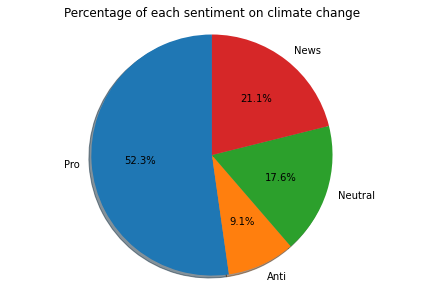

In [ ]:
# Pie chart
labels = ['Pro', 'Anti', 'Neutral', 'News']
sizes = [semt_count[1], semt_count[-1], semt_count[0], semt_count[2]]
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Percentage of each sentiment on climate change')
plt.show()

Our analysis will focus on the Pro, Neutral and Anti tweets.

### Calculate average sentiment score and compare on different groups

In [ ]:
afinn = Afinn()
twitter_sentiment_data_df['score'] = twitter_sentiment_data_df['message'].apply(afinn.score)


In [ ]:
semt_avg_df = twitter_sentiment_data_df.groupby('sentiment').mean()
semt_avg_df = semt_avg_df.drop(axis = 1, columns='tweetid')


In [ ]:
semt_avg_df =  semt_avg_df.reset_index()

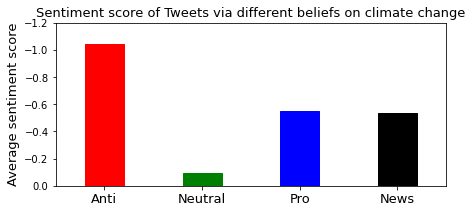

In [ ]:
#semt_avg_df.plot.bar(rot = 0)
x = semt_avg_df['sentiment']
y = semt_avg_df['score']
fig = plt.figure(figsize =(7, 3))
barlist = plt.bar(x,y, color ='maroon',width = 0.4)
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('b')
barlist[3].set_color('k')
plt.axis([-1.5,2.5,0,-1.2])
plt.ylabel('Average sentiment score',fontsize = 13)
plt.xlabel('')
plt.title('Sentiment score of Tweets via different beliefs on climate change',fontsize = 13)
plt.xticks(np.arange(-1,3,1), ('Anti', 'Neutral', 'Pro','News'),fontsize = 13)
plt.show()

We found tweets that refutes the belief of man-made climate change tend to have more negative words than tweets which support the belief , and tweets have a neutral stand point have the least negative words.



### Cleaning the data

In [ ]:
# Clean the data
#remove the links, hash characters and username, retweet mark RT
cleaned_df = twitter_sentiment_data_df
cleaned_df['message'] = twitter_sentiment_data_df['message'].apply(lambda x : re.sub(\
                                  r"(@[A-Za-z0–9_]+)|RT|amp|[^\w\s]|#|http\S+","",x))
cleaned_df['message'] = cleaned_df['message'].apply(lambda x : x.replace("\n",""))
cleaned_df['message'] = cleaned_df['message'].str.strip()
cleaned_df['message'] = cleaned_df['message'].replace(to_replace = " +",value = ' ',regex = True)

In [ ]:
cleaned_df['message'].head(20)

0     climate change is an interesting hustle as it ...
1     Watch BeforeTheFlood right here as travels the...
2     Fabulous Leonardo DiCaprios film on climate ch...
3     Just watched this amazing documentary by leona...
4     Pranita Biswasi a Lutheran from Odisha gives t...
5         Unamshow awache kujinga na iko global warming
6     Pranita Biswasi a Lutheran from Odisha gives t...
7     Presidential Candidate DonaldTrump is ÃâÅdange...
8     8 Leonardo DiCaprios climate change documentar...
9     BeforeTheFlood Watch BeforeTheFlood right here...
10    Its vital that the public health community add...
11    Bangladesh did not cause climate change so the...
12    Watch BeforeTheFlood right here as travels the...
13    Nows the time we need a strong FTT that works ...
14    Reflections on Leonardo DiCaprioÃââs new clima...
15    The problem with global warmingÃââand the reas...
16    One of the easiest ways to help combat climate...
17    Watch Leo DiCaprios climate change doc onl

In [ ]:
# separate the data into 4 categories based on sentiment
anti_content_df = cleaned_df[cleaned_df["sentiment"] == -1]
anti_content = anti_content_df['message'].values.tolist()
pro_content_df = cleaned_df[cleaned_df["sentiment"] == 1]
pro_content = pro_content_df['message'].values.tolist()
neutral_content_df = cleaned_df[cleaned_df["sentiment"] == 0]
neutral_content = neutral_content_df['message'].values.tolist()
news_content_df = cleaned_df[cleaned_df["sentiment"] == 2]
news_content = news_content_df['message'].values.tolist()

### Tokenize the text

In [ ]:
# use stopwords library
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Create tokenized_content(content)
def tokenized_content(content):
  wordslist = []
  for text in content:
    words = nltk.word_tokenize(text)
    for word in words:
      if word.isalpha() and word.lower() not in stopwords:
          wordslist.append(word.lower())
  return wordslist

In [ ]:
# Tokenize and flatten
nltk.download('punkt')
anti_tokens = tokenized_content(anti_content)
pro_tokens = tokenized_content(pro_content)
neutral_tokens = tokenized_content(neutral_content)
news_tokens = tokenized_content(news_content)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# remove the most frequent appearing word, such as 'climate','change','global','warming'
# for better comparision between different datasets
word_list = ['climate','change','global','warming']
def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]
for word in word_list:
  anti_tokens = remove_values_from_list(anti_tokens, word)
  pro_tokens = remove_values_from_list(pro_tokens, word)
  neutral_tokens = remove_values_from_list(neutral_tokens, word)
  news_tokens = remove_values_from_list(news_tokens, word)
  

### Find the most common word and generate word cloud

In [ ]:
# Find the difference between counters and get the 20 most common words fo anti posts
distinct_anti_content_most_common = (Counter(anti_tokens) -Counter(pro_tokens)-Counter(neutral_tokens))
distinct_anti_content_most_common.most_common(20)

[('scam', 115),
 ('liberals', 57),
 ('alarmists', 45),
 ('tcot', 43),
 ('manipulated', 43),
 ('noncompetitive', 37),
 ('isis', 34),
 ('enlist', 32),
 ('duped', 32),
 ('fraud', 31),
 ('liberal', 27),
 ('blames', 26),
 ('hysteria', 25),
 ('founder', 25),
 ('pjnet', 23),
 ('crap', 23),
 ('cooling', 22),
 ('coleman', 22),
 ('tax', 19),
 ('religion', 17)]

In [ ]:
# Find the difference between counters and get the 20 most common words of pro posts
distinct_pro_content_most_common = (Counter(pro_tokens) -Counter(anti_tokens)-Counter(neutral_tokens))
distinct_pro_content_most_common.most_common(20)

[('believe', 1555),
 ('trump', 1363),
 ('doesnt', 1153),
 ('shes', 1017),
 ('going', 882),
 ('world', 779),
 ('real', 776),
 ('fight', 744),
 ('people', 744),
 ('us', 658),
 ('die', 619),
 ('thinking', 525),
 ('dont', 517),
 ('husband', 508),
 ('need', 499),
 ('new', 473),
 ('action', 458),
 ('via', 405),
 ('planet', 395),
 ('deniers', 393)]

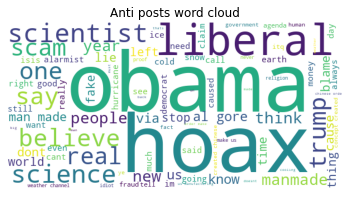

In [ ]:
# word cloud of anti posts

anti_text = (" ").join(anti_tokens)
wordcloud = WordCloud(background_color= 'white',scale=1.5).generate(anti_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Anti posts word cloud')
plt.show()

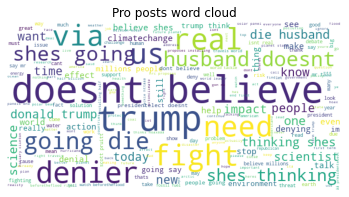

In [ ]:
# word cloud of pro posts

pro_text = (" ").join(pro_tokens)
wordcloud = WordCloud(background_color= 'white',scale=1.5).generate(pro_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Pro posts word cloud')
plt.show()


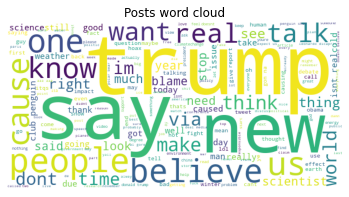

In [ ]:
# word cloud of neutral posts

neutral_text = (" ").join(neutral_tokens)
wordcloud = WordCloud(background_color= 'white',scale=1.5).generate(neutral_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Posts word cloud')
plt.show()

By using word cloud, we found each groups have their own frequent using words, some of them are interesting, for example, people don't believe human made climate change tends to use `Obama` in their posts to attack the other side, on the other hand, people supports man-made climate change use `Trump` a lot. 

## ARIMA Prediction

### In the section, we will analyze the Global temperture on earth and use the ARIMA model to forecast the temperature in the next 20 years.

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import pacf
from dateutil.relativedelta import relativedelta
import datetime
from statsmodels.tsa.arima_model import ARMA
import pmdarima as pm 
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from numpy import log 
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima_model import ARIMA
from dateutil.parser import parse

###Step 1: To find the order of differencing(d) in ARIMA model

First, we need to check if the series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.

Because, you need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.
The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

In [ ]:
Temp_ARIMA_df = GlobalTemperatures_df[['LandAverageTemperature','dt']].set_index('dt')
Temp_ARIMA_df

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


In [ ]:
# %% ADF Test 
test = Temp_ARIMA_df['LandAverageTemperature'].dropna()
result = adfuller(test.values, autolag='AIC') 
print(f'ADF Statistic: {result[0]}') 
print(f'p-value: {result[1]}') 
for key, value in result[4].items(): 
    print('Critial Values:') 
    print(f'   {key}, {value}') 

ADF Statistic: -3.99167757435154
p-value: 0.001454722381905883
Critial Values:
   1%, -3.432427002601706
Critial Values:
   5%, -2.8624576920765237
Critial Values:
   10%, -2.5672585088743345


p-value is smaller than the significance level, we infer that the time series is stationary. Therefore, the order of differencing d is set to 0.

###Step 2 : To find the order of AR term (p) and MA term (q)

There are basically 2 ways to identify the AR term (p), either manually or automatically. For the sake of convenience, here I use the auto_arima function to automatically choose the best parameter p and q by comparing the Likelihood of model’s effectiveness.(which can be related to accuracy in later prediction)

In [ ]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple/ --upgrade pmdarima # Need to be installed for modelling 

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


In [ ]:
# Seperate the data into train (80 years) and test data (20 years)
Temp_train = Temp_ARIMA_df.loc['1915-12-01':'1995-12-01', ['LandAverageTemperature']] 
Temp_test = Temp_ARIMA_df.loc['1995-12-01':'2015-12-01', ['LandAverageTemperature']] 

In [ ]:
model = pm.auto_arima(Temp_train, # The dataset used to fit the model and prediction will be based on it, here I took 2 months for example. 

                      start_p=1, start_q=1,  
                      test='adf',        # use adf test to find optimal 'd' 
                      max_p=3, max_q=3,  # maximum p and q 
                      m=1,               # frequency of series 
                      d=None,            # let model determine 'd' 
                      seasonal=False,    # No Seasonality 
                      start_P=0, 
                      D=0, 
                      trace=True, 
                      error_action='ignore', 
                      suppress_warnings=True, 
                      stepwise=True) 
 
print(model.summary()) 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3439.074, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7081.491, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4226.361, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5840.285, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2818.500, Time=0.36 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2987.659, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=2.34 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2616.732, Time=1.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3020.447, Time=0.77 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=945.680, Time=3.14 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=782.560, Time=4.55 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2449.189, Time=1.62 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=922.345, Time=6.24 sec

Best model:  ARIMA(3,0,3)(0,0,0)[0]          
Total fit time: 21.337 seconds
                             

From the output results, we find the best model to be p = 3 and q = 2 turn to be the best parameter in building the model. And we also find the name of model has been assigned to SARIMAX (seasonality supported ) in this final fitting algorithm, which means the auto_arimia fitting algorithm detected the time series to have clear seasonality, and suggested us to use SARIMAX model.

### Step 3 : Automatically build SARIMA model in python

Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, you subtract the value from the previous season.

So, the model will be represented as SARIMA(p,d,q)x(P,D,Q), where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series.

If your model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.

Here’s some practical advice on building SARIMA model:

As a general rule, set the model parameters such that D never exceeds one. And the total differencing ‘d + D’ never exceeds 2. Try to keep only either SAR or SMA terms if your model has seasonal components.

Therefore, we use the same way to automatically identify the parameters of the SARIMA model.

In [ ]:

# Seasonal - fit stepwise auto-ARIMA 
smodel = pm.auto_arima(Temp_train, start_p=1, start_q=1, 
                       test='adf', 
                       max_p=3, max_q=3, m= 12,# m is number of estimators in one seasonal period                        

                       start_P=0, D =1 ,seasonal=True, 
                       d=None, trace=True, 
                       error_action='ignore', 
                       suppress_warnings=True, 
                       stepwise=True) 
smodel.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=9.88 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1167.067, Time=0.39 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=723.659, Time=3.23 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=10.10 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1165.847, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1038.374, Time=0.25 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=619.082, Time=5.24 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=14.26 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.82 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=765.605, Time=5.89 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=595.263, Time=6.54 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=699.052, Time=2.71 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=19.44 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=7.24 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=588.053,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  961
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                -286.205
Date:                             Thu, 16 Dec 2021   AIC                            582.411
Time:                                     02:09:34   BIC                            606.688
Sample:                                          0   HQIC                           591.661
                                             - 961                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7973      0.042     18.984      0.000       0.715       0.880
ma.L1         -0.5085      0.058     -8.815      0.000      -0.622      -0.395
ar.S.L12      -0.7243      0.025    -29.331      0.000      -0.773      -0.676
ar.S.L24      -0.3331      0.026    -12.776      0.000      -0.384      -0.282
sigma2         0.1062      0.004     27.008      0.000       0.099       0.114
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                48.29
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.02
Prob(H) (two-sided):                  0.73   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Step 4: Data forecasting using the model we created

Now let's forecast based on train data and compare the results to test data

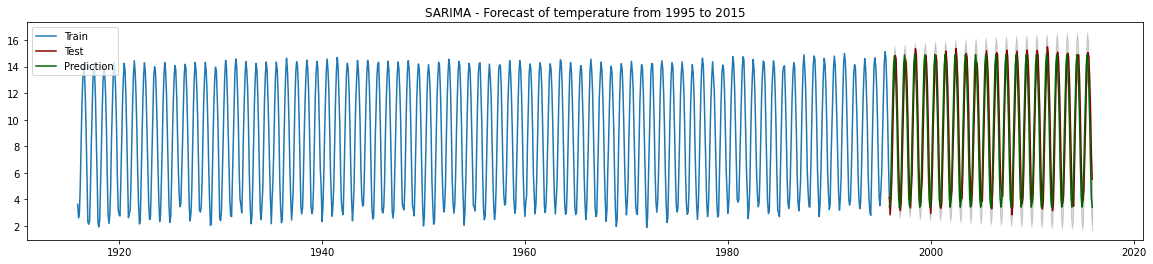

In [ ]:
# Forecast
n_periods = 12*20+1
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(Temp_train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig = plt.figure(figsize = (20,4))
plt.plot(Temp_train, label='Train')
plt.plot(Temp_test, color='darkred', label='Test')
plt.plot(fitted_series, color='darkgreen', label= 'Prediction')

plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Forecast of temperature from 1995 to 2015")
plt.legend()
plt.show()


Let's evaluate the model by computing the prediction error

In [ ]:
#Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mae = mean_absolute_error(fitted_series, Temp_test) 
r2 = r2_score(fitted_series, Temp_test)
mse = mean_squared_error(fitted_series, Temp_test)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("r2_score:",r2)


Mean Absolute Error: 1.9398569182193823
Mean Squared Error: 4.787751591940376
r2_score: 0.7191676451591726


### Now let's make the final forecast of the temperature in the next 20 years till 2035!

In [ ]:
Temp_train_new = Temp_ARIMA_df.loc['1915-12-01':'2015-12-01', ['LandAverageTemperature']] 

In [ ]:
# Seasonal - fit stepwise auto-ARIMA 
smodel_new = pm.auto_arima(Temp_train_new, start_p=1, start_q=1, 
                       test='adf', 
                       max_p=3, max_q=3, m= 12,# m is number of estimators in one seasonal period                        

                       start_P=0, D =1 ,seasonal=True, 
                       d=None, trace=True, 
                       error_action='ignore', 
                       suppress_warnings=True, 
                       stepwise=True) 
smodel_new.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=14.03 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1450.373, Time=0.41 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=888.804, Time=3.33 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=625.346, Time=4.01 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1449.744, Time=0.13 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1337.628, Time=0.54 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=621.224, Time=7.05 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=936.259, Time=2.86 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=623.152, Time=14.90 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=623.125, Time=28.81 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=621.368, Time=8.72 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=801.951, Time=6.39 sec
 ARIMA(0,0,1)(2,1,2)[12] intercept   : AIC=inf, Time=27.41 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=749.965, Time=3.35 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 1201
Model:             SARIMAX(0, 0, 3)x(1, 1, [1], 12)   Log Likelihood                -265.996
Date:                              Thu, 16 Dec 2021   AIC                            545.993
Time:                                      02:55:41   BIC                            581.559
Sample:                                           0   HQIC                           559.396
                                             - 1201                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0148      0.002      6.577      0.000       0.010       0.019
ma.L1          0.3071      0.026     11.729      0.000       0.256       0.358
ma.L2          0.2283      0.029      7.976      0.000       0.172       0.284
ma.L3          0.1247      0.031      3.998      0.000       0.064       0.186
ar.S.L12      -0.0866      0.027     -3.151      0.002      -0.141      -0.033
ma.S.L12      -0.8608      0.017    -51.202      0.000      -0.894      -0.828
sigma2         0.0902      0.003     30.036      0.000       0.084       0.096
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                60.63
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.09
Prob(H) (two-sided):                  0.78   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

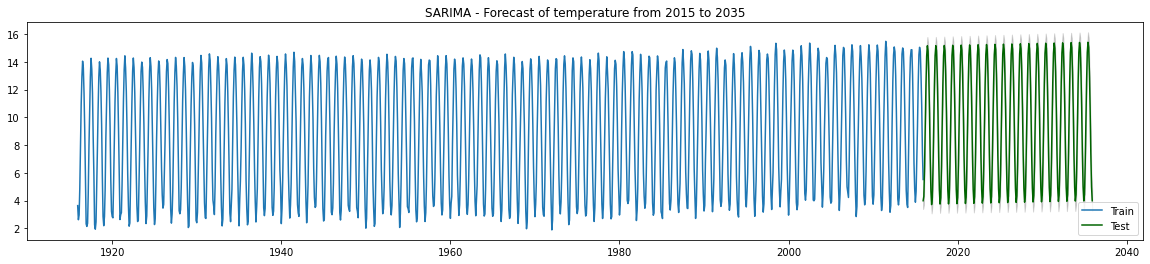

In [ ]:
# Forecast
n_periods = 12*20+1
fitted, confint = smodel_new.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(Temp_train_new.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig = plt.figure(figsize = (20,4))
plt.plot(Temp_train_new, label='Train')
plt.plot(fitted_series, color='darkgreen',label='Test')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Forecast of temperature from 2015 to 2035")
plt.legend()
plt.show()

### We have the tempeature till 2035!


# Conclusion

*1. What we gained from the analysis and what significant / interesting phenonmon can we interperated from the results?*


*   Like what we predicted before, the data from natural phenomena can actually predict the global temperature well, with a reliable accuracy (tipically > 90%) from our random forest model. The fitted regression models of one of those datasets, oceanic zooplankton, also proves this.

*   As for the social effects part, datasets of US droughts and global GDP present quite various results of regression. While the results of elastic net regression is as good as previous ones, the regression for GDP is not as good as we expected, showing that the increasing trends of GDP involve much more factors apart from the global temperature.

*   The sentiment analysis on Twitter dataset reverals the difference of sentiment score in words used by groups hold different opinon on climate change, and the most common words also have their own traits.

*   We built an ARIMA model which performed well in the time-series dataset of temperature, and we succeeded in forecasting the temperature in the next 20 years.


*2. How it matches with our initial proposal? What we failed to achieve and what is the reason?*

*   We have made multiple visualizations and big data models with our datasets, which help us draw the conclusions above. Such heavy tasks match well with our initial proposal.

*   Due to the poor regression models from social datasets, we deleted that of global plastics and only keep GDP as an example.

# Next Step
*What improvements can be made in the future?*

*   When considering analyzing the effects of climate changes on social phenomena, maybe we should consider from more attitudes and include more datasets.

*   We may scrap Twitter data on our own so that we can extract more information like the time and the locations of tweets.